In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

#División datos
from sklearn.model_selection import train_test_split
#Cross-Validation
from sklearn.model_selection import cross_validate

#Metricas
import sklearn
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, recall_score, precision_score, confusion_matrix

#ROC y AUC
from sklearn.metrics import roc_curve, roc_auc_score


#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


UCI ML Repo: Breast Cancer Wisconsin (Diagnostic) Data Set

http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [4]:
breast_c = pd.read_csv('/Users/sebaguerraty-macbook/Github/Aux-IN6531-/Aux Clasification/data/breast-cancer-wisconsin.data')

In [5]:
breast_c.columns  = ['ID number', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_adhesion', 'Single_e_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']

In [6]:
breast_c.head()

,ID number,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [7]:
## EDA + transformaciones de variable y Dummies (no applica en este caso)

In [8]:
breast_c[ breast_c['Bare_nuclei'] =='?'].shape

(16, 11)

In [9]:
breast_c.dtypes

ID number                 int64
Clump_thickness           int64
Uniformity_cell_size      int64
Uniformity_cell_shape     int64
Marginal_adhesion         int64
Single_e_cell_size        int64
Bare_nuclei              object
Bland_chromatin           int64
Normal_nucleoli           int64
Mitoses                   int64
Class                     int64
dtype: object

In [10]:
breast_c['Bare_nuclei'] = pd.to_numeric(breast_c['Bare_nuclei'], errors='coerce')

In [11]:
breast_c['Bare_nuclei'].fillna(method='ffill', inplace=True)

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
    1. Sample code number            id number
    2. Clump Thickness               1 - 10
    3. Uniformity of Cell Size       1 - 10
    4. Uniformity of Cell Shape      1 - 10
    5. Marginal Adhesion             1 - 10
    6. Single Epithelial Cell Size   1 - 10
    7. Bare Nuclei                   1 - 10
    8. Bland Chromatin               1 - 10
    9. Normal Nucleoli               1 - 10
    10. Mitoses                       1 - 10
    11. Class:                        (2 for benign, 4 for malignant)

In [12]:
breast_c['Class'].replace(4, 1, inplace=True)
breast_c['Class'].replace(2, 0, inplace=True)

In [13]:
breast_c.head()

,ID number,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,0
1,1015425,3,1,1,1,2,2.0,3,1,1,0
2,1016277,6,8,8,1,3,4.0,3,7,1,0
3,1017023,4,1,1,3,2,1.0,3,1,1,0
4,1017122,8,10,10,8,7,10.0,9,7,1,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(breast_c.drop(columns=['ID number', 'Class']), breast_c['Class'], test_size=0.2, random_state=123, stratify=breast_c.Class)

In [15]:
models = []
models.append(('LOGIT  ', LogisticRegression()))
models.append(('KNN    ', KNeighborsClassifier()))
models.append(('D_TREE ', DecisionTreeClassifier()))
models.append(('RandomForest ', RandomForestClassifier()))
models.append(('SVM    ', SVC()))

In [19]:

for name, model in models:
    #Ajuste del modelo
    model.fit(X_train, y_train)
    
    
    #Predecir
    y_pred = model.predict(X_test)
    
    #Metricas de testeo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall  = recall_score(y_test, y_pred)
    
    #metricas de conjunto de entrenamiento
    train_pred = model.predict(X_train)

    train_acc = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    #Print de datos
    
    print("Modelo: {}".format(name))
    print('train accuracy: {:.2f}, train precision: {:.2f}, train recall: {:.2f}'.format(train_acc, train_precision, train_recall))
    print("accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}".format(accuracy, precision, recall))
    print("")
    

Modelo: LOGIT  
train accuracy: 0.97, train precision: 0.96, train recall: 0.96
accuracy: 0.94, precision: 0.93, recall: 0.88

Modelo: KNN    
train accuracy: 0.98, train precision: 0.97, train recall: 0.98
accuracy: 0.94, precision: 0.93, recall: 0.90

Modelo: D_TREE 
train accuracy: 1.00, train precision: 1.00, train recall: 1.00
accuracy: 0.91, precision: 0.93, recall: 0.79

Modelo: RandomForest 
train accuracy: 1.00, train precision: 1.00, train recall: 1.00
accuracy: 0.94, precision: 0.93, recall: 0.88

Modelo: SVM    
train accuracy: 0.98, train precision: 0.96, train recall: 0.97
accuracy: 0.95, precision: 0.94, recall: 0.92



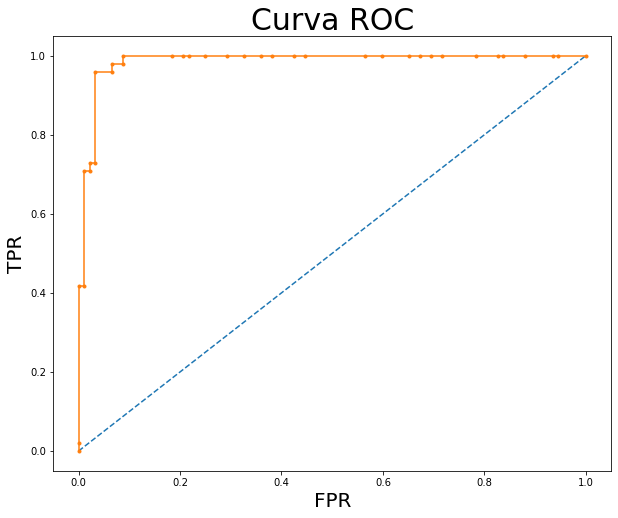

AUC: 0.986


In [27]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

probs = log_model.predict_proba(X_test)[:,1]

# Curva roc
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.figure(figsize = (10, 8))
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR', size = 20)
plt.ylabel('TPR', size = 20)
plt.title('Curva ROC', size = 30)
plt.show()

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

ROC, AUC Precision y Recall

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" alt="precision and recall" width=400 height=500 >

F1 score = 2 · 
Precision · Recall
/
Precision + Recall

Accuracy (ACC) = 
Σ True positive + Σ True negative
/
Σ Total population

source: https://en.wikipedia.org/wiki/Precision_and_recall

<img src="https://miro.medium.com/max/1400/1*ESe25wSUx7vE-v3w2-v77A.png" alt="balanced dataset" width="500" height="400">

<img src="https://miro.medium.com/max/1400/1*Ij5JIzexbW8JiJSPuDa01g.png" alt="Imbalanced dataset" width=500 height=400>



<img src="https://miro.medium.com/max/2000/1*0itx-rI4iTMB42t4ya64Ow.png" alt="Imbalanced dataset" width=800 height=400>
source: https://towardsdatascience.com/guide-to-classification-on-imbalanced-datasets-d6653aa5fa23

In [30]:
pd.Categorical(breast_c['Class']).describe()

,counts,freqs
categories,,
0,457,0.654728
1,241,0.345272


<h3> Up Sampeling de la categoria dominante </h3>

In [31]:
from sklearn.utils import resample

In [34]:
with_class_df = pd.concat([X_train, y_train], axis=1)

mailg = with_class_df[ with_class_df.Class == 1]
benig = with_class_df[ with_class_df.Class == 0]

malig_upsampled = resample( mailg, replace=True, n_samples= len(benig) ,random_state=123)

upsampled_train = pd.concat([malig_upsampled, benig], axis=0)

upsampled_train.Class.value_counts()

1    365
0    365
Name: Class, dtype: int64

In [36]:
X_train_up = upsampled_train.drop(columns='Class')
y_train_up = upsampled_train.Class

upsampled_mod = LogisticRegression(solver='liblinear').fit(X_train_up, y_train_up)

pred_up = upsampled_mod.predict(X_test)

acc_score_up = accuracy_score(y_test, y_pred= pred_up)
preci_up = precision_score(y_test, pred_up)
recall_up = recall_score(y_test, pred_up)

print('Upsampled accuracy score: {:.3f}'.format(acc_score_up))
print('Upsampled precision score: {:.3f}'.format(preci_up))
print('Upsampled recall score: {:.3f}'.format(recall_up))

Upsampled accuracy score: 0.929
Upsampled precision score: 0.896
Upsampled recall score: 0.896


<h3> Down sampeling de la categoria domniante</h3>

In [38]:
with_class_df = pd.concat([X_train, y_train], axis=1)

malig = with_class_df[ with_class_df.Class == 1]
benig = with_class_df[ with_class_df.Class == 0]

benig_downsampled = resample( benig, replace=True, n_samples= len(mailg) ,random_state=123)

downsampled_train = pd.concat([malig, benig_downsampled], axis=0)

downsampled_train.Class.value_counts()

1    193
0    193
Name: Class, dtype: int64

In [40]:
X_train_do = downsampled_train.drop(columns='Class')
y_train_do = downsampled_train.Class

downsampled_mod = LogisticRegression(solver='liblinear').fit(X_train_do, y_train_do)

pred_do = downsampled_mod.predict(X_test)

acc_score_do = accuracy_score(y_test, y_pred= pred_do)
preci_do = precision_score(y_test, pred_do)
recall_do = recall_score(y_test, pred_do)

print('Downsampled accuracy score: {:.3f}'.format(acc_score_do))
print('Downsampled precision score: {:.3f}'.format(preci_do))
print('Downsmpled recall score: {:.3f}'.format(recall_do))

Downsampled accuracy score: 0.929
Downsampled precision score: 0.913
Downsmpled recall score: 0.875


<h3> Generar datos de la clase minoritaria ajustando un modelo SMOTE (Synthetic Minority Oversampling Technique) </h3>

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
#sm = SMOTE(sampling_strategy= 1.0, random_state=123)
sm = SMOTE(sampling_strategy='not majority', random_state=123)

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

y_train_sm.value_counts()

1    365
0    365
Name: Class, dtype: int64

In [46]:
smote_mod = LogisticRegression(solver='liblinear').fit(X_train_sm, y_train_sm)

pred_sm = downsampled_mod.predict(X_test)

acc_score_sm = accuracy_score(y_test, y_pred= pred_sm)
preci_sm = precision_score(y_test, pred_sm)
recall_sm = recall_score(y_test, pred_sm)

print('Generated class balanced SMOTE accuracy score: {:.3f}'.format(acc_score_sm))
print('Generated class balanced SMOTE precision score: {:.3f}'.format(preci_sm))
print('Generated class balanced SMOTE recall score: {:.3f}'.format(recall_sm))

Generated class balanced SMOTE accuracy score: 0.929
Generated class balanced SMOTE precision score: 0.913
Generated class balanced SMOTE recall score: 0.875
